1. Accuracy (default): 1.0
2. Feature importances (Gini): [0.01787567 0.01787567 0.39794324 0.56630542]
3. Accuracy (Entropy): 0.9736842105263158
4. MSE (regressor): 0.5165410815275968


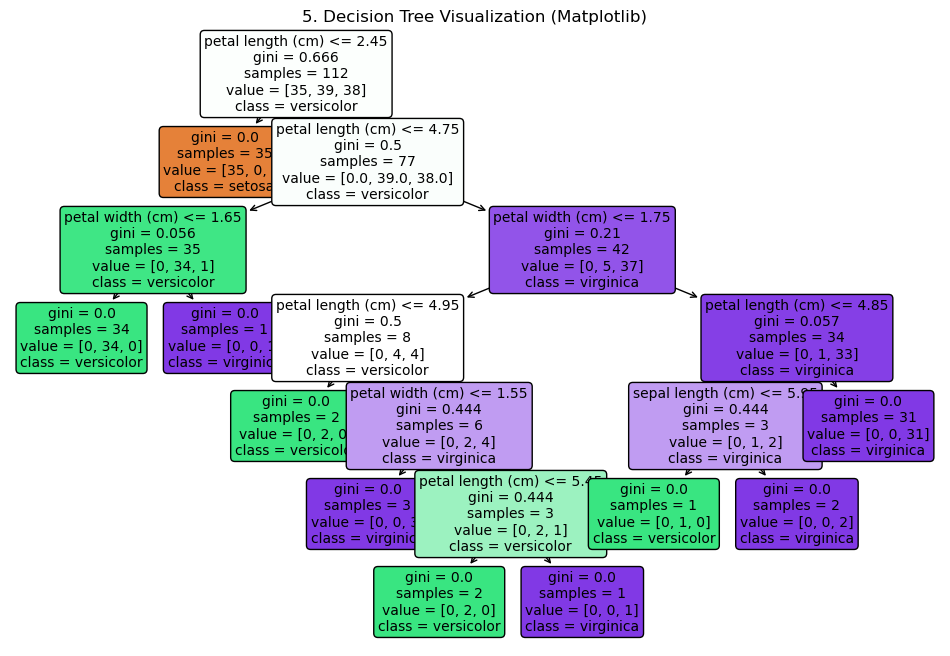

6. Accuracy (depth=3): 1.0
   Accuracy (full tree): 1.0
7. Accuracy (min_samples_split=5): 1.0
8. Accuracy (scaled): 1.0
   Accuracy (unscaled): 1.0
9. Accuracy (OvR): 1.0
10. Feature importances: [0.01787567 0.         0.89974604 0.08237829]
11. MSE (depth=5): 0.5267999896911421
    MSE (unrestricted): 0.5165410815275968


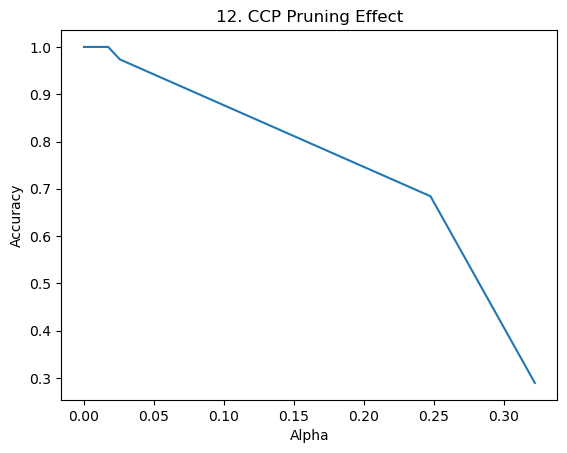

13. Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



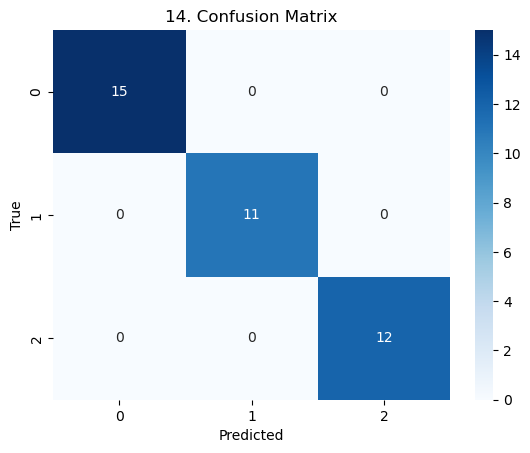

15. Best parameters from GridSearchCV: {'max_depth': 4, 'min_samples_split': 2}
    Accuracy with best params: 1.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
import graphviz
from sklearn import tree

# 1. Load Iris dataset and train classifier
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("1. Accuracy (default):", clf.score(X_test, y_test))

# 2. Train using Gini Impurity
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)
print("2. Feature importances (Gini):", clf_gini.feature_importances_)

# 3. Train using Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)
print("3. Accuracy (Entropy):", clf_entropy.score(X_test, y_test))

# 4. Train Regressor on housing dataset
housing = fetch_california_housing()
Xh, yh = housing.data, housing.target
Xh_train, Xh_test, yh_train, yh_test = train_test_split(Xh, yh, random_state=42)
regressor = DecisionTreeRegressor()
regressor.fit(Xh_train, yh_train)
yh_pred = regressor.predict(Xh_test)
print("4. MSE (regressor):", mean_squared_error(yh_test, yh_pred))

# 5. Visualize decision tree using graphviz
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names,
          filled=True, rounded=True, fontsize=10)
plt.title("5. Decision Tree Visualization (Matplotlib)")
plt.show()

# 6. Max depth 3 vs full tree
clf_depth3 = DecisionTreeClassifier(max_depth=3)
clf_depth3.fit(X_train, y_train)
print("6. Accuracy (depth=3):", clf_depth3.score(X_test, y_test))
print("   Accuracy (full tree):", clf.score(X_test, y_test))

# 7. min_samples_split=5 vs default
clf_split5 = DecisionTreeClassifier(min_samples_split=5)
clf_split5.fit(X_train, y_train)
print("7. Accuracy (min_samples_split=5):", clf_split5.score(X_test, y_test))

# 8. Feature scaling vs unscaled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, random_state=42)
clf_scaled = DecisionTreeClassifier()
clf_scaled.fit(X_train_scaled, y_train_scaled)
print("8. Accuracy (scaled):", clf_scaled.score(X_test_scaled, y_test_scaled))
print("   Accuracy (unscaled):", clf.score(X_test, y_test))

# 9. OvR strategy for multiclass
ovr_clf = OneVsRestClassifier(DecisionTreeClassifier())
ovr_clf.fit(X_train, y_train)
print("9. Accuracy (OvR):", ovr_clf.score(X_test, y_test))

# 10. Feature importance scores
print("10. Feature importances:", clf.feature_importances_)

# 11. Regressor with max_depth=5 vs unrestricted
regressor5 = DecisionTreeRegressor(max_depth=5)
regressor5.fit(Xh_train, yh_train)
pred5 = regressor5.predict(Xh_test)
print("11. MSE (depth=5):", mean_squared_error(yh_test, pred5))
print("    MSE (unrestricted):", mean_squared_error(yh_test, yh_pred))

# 12. Cost Complexity Pruning (CCP)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
clfs = [DecisionTreeClassifier(ccp_alpha=alpha).fit(X_train, y_train) for alpha in ccp_alphas]
acc = [clf.score(X_test, y_test) for clf in clfs]

plt.figure()
plt.plot(ccp_alphas, acc)
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("12. CCP Pruning Effect")
plt.show()

# 13. Precision, Recall, F1
y_pred = clf.predict(X_test)
print("13. Classification Report:\n", classification_report(y_test, y_pred))

# 14. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("14. Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 15. GridSearchCV for best depth and split
param_grid = {'max_depth': [2, 3, 4, 5], 'min_samples_split': [2, 5, 10]}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("15. Best parameters from GridSearchCV:", grid.best_params_)
print("    Accuracy with best params:", grid.score(X_test, y_test))